# Exercise: More metrics derived from confusion matrices

In this exercise, we learn about different metrics, using them to explain the results obtained from the *binary classification model* we built in the previous unit.

## Data visualization

Let's use the dataset with different classes of objects found on the mountain one more time:



In [1]:
import pandas
import numpy
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/snow_objects.csv

#Import the data from the .csv file
dataset = pandas.read_csv('snow_objects.csv', delimiter="\t")

#Let's have a look at the data
dataset

--2025-09-20 16:25:57--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py.2’

graphing.py.2       100%[===================>]  21.01K  --.-KB/s    in 0s      

2025-09-20 16:25:57 (75.5 MB/s) - ‘graphing.py.2’ saved [21511/21511]

--2025-09-20 16:25:59--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/snow_objects.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent,

,size,roughness,color,motion,label
0,50.959361,1.318226,green,0.054290,tree
1,60.008521,0.554291,brown,0.000000,tree
2,20.530772,1.097752,white,1.380464,tree
3,28.092138,0.966482,grey,0.650528,tree
4,48.344211,0.799093,grey,0.000000,tree
...,...,...,...,...,...
2195,1.918175,1.182234,white,0.000000,animal
2196,1.000694,1.332152,black,4.041097,animal
2197,2.331485,0.734561,brown,0.961486,animal
2198,1.786560,0.707935,black,0.000000,animal


Recall that to use the preceeding dataset for *binary classification*, we need to add another column to the dataset, and set it to `True` where the original label is `hiker`, and `False` where it's not.

Let's add that label, split the dataset, and train the model again:


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Add a new label with true/false values to our dataset
dataset["is_hiker"] = dataset.label == "hiker"

# Split the dataset in an 70/30 train/test ratio. 
train, test = train_test_split(dataset, test_size=0.3, random_state=1, shuffle=True)

# define a random forest model
model = RandomForestClassifier(n_estimators=1, random_state=1, verbose=False)

# Define which features are to be used 
features = ["size", "roughness", "motion"]

# Train the model using the binary label
model.fit(train[features], train.is_hiker)

print("Model trained!")

Model trained!


We can now use this model to predict whether objects in the snow are hikers or not.

Let's plot its *confusion matrix*:

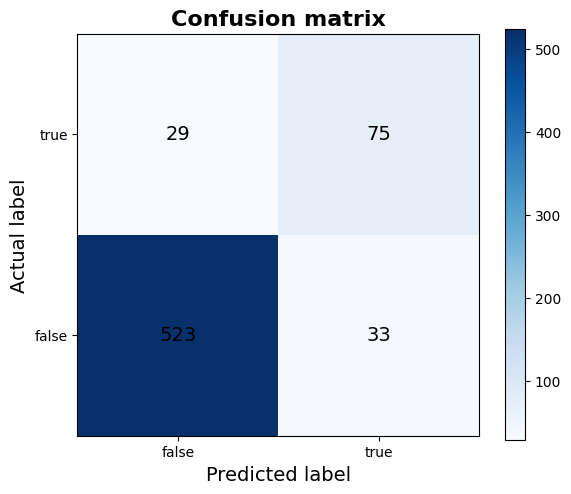

In [3]:
# sklearn has a very convenient utility to build confusion matrices

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Calculate actual and predictions
actual = test.is_hiker
predictions = model.predict(test[features])

# Build confusion matrix (non-normalized)
cm = confusion_matrix(actual, predictions, normalize=None)

# Unique labels sorted and lowercase strings for display
unique_targets = sorted(list(test["is_hiker"].unique()))
labels = [str(s).lower() for s in unique_targets]

fig, ax = plt.subplots(figsize=(6, 5))

# Plot confusion matrix heatmap
cax = ax.imshow(cm, interpolation='nearest', cmap='Blues')

# Add colorbar (legend)
fig.colorbar(cax)

# Annotate cells with counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)

# Set ticks and labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Axis labels and title
ax.set_xlabel("Predicted label", fontsize=14)
ax.set_ylabel("Actual label", fontsize=14)
ax.set_title("Confusion matrix", fontsize=16, fontweight='bold')

# Invert y-axis to match Plotly category descending order
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [4]:
# Let's also calculate some values that will be used throughout this exercise
# We already have actual values and corresponding predictions, defined above
correct = actual == predictions
tp = numpy.sum(correct & actual)
tn = numpy.sum(correct & numpy.logical_not(actual))
fp = numpy.sum(numpy.logical_not(correct) & actual)
fn = numpy.sum(numpy.logical_not(correct) & numpy.logical_not(actual))

print("TP - True Positives: ", tp)
print("TN - True Negatives: ", tn)
print("FP - False positives: ", fp)
print("FN - False negatives: ", fn)


TP - True Positives:  75
TN - True Negatives:  523
FP - False positives:  29
FN - False negatives:  33


We can use the preceding values and matrix to help us understand other metrics.


## Calculating metrics

From here on, we take a closer look at each at the following metrics, how they're calculated, and how they can help explain our current model. 

* Accuracy
* Sensitivity/Recall
* Specificity
* Precision
* False positive rate

Let's first recall some useful terms:

* TP = True positives: a positive label is correctly predicted
* TN = True negatives: a negative label is correctly predicted
* FP = False positives: a negative label is predicted as a positive
* FN = False negatives: a positive label is predicted as a negative


### Accuracy
Accuracy is the number of correct predictions divided by the total number of predictions:

```
    accuracy = (TP+TN) / number of samples
```

It's possibly the most basic metric used but, as we've seen, it's not the most reliable when *imbalanced datasets* are used.

In code:

In [5]:
# Calculate accuracy
# len(actual) is the number of samples in the set that generated TP and TN
accuracy = (tp+tn) / len(actual) 

# print result as a percentage
print(f"Model accuracy is {accuracy:.2f}%")

Model accuracy is 0.91%


### Sensitivity/Recall

*Sensitivity* and *Recall* are interchangeable names for the same metric, which expresses the fraction of samples __correctly__ predicted by a model:


```
    sensitivity = recall = TP / (TP + FN)
```

This is an important metric, that tells us how out of all the *actually* __positive__ samples, how many are __correctly__ predicted as positive.

In code:

In [6]:
# code for sensitivity/recall
sensitivity = recall = tp / (tp + fn)

# print result as a percentage
print(f"Model sensitivity/recall is {sensitivity:.2f}%")

Model sensitivity/recall is 0.69%


### Specificity
Specificity expresses the fraction of __negative__ labels correctly predicted over the total number of existing negative samples:

```
    specificity = TN / (TN + FP)
```

Specificity tells us how out of all the *actually* __negative__ samples, how many are __correctly__ predicted as negative.

We can calculate it using the following code:

In [7]:
# Code for specificity
specificity = tn / (tn + fp)

# print result as a percentage
print(f"Model specificity is {specificity:.2f}%")

Model specificity is 0.95%


### Precision
Precision expresses the proportion of __correctly__ predicted positive samples over all positive predictions:

```
    precision = TP / (TP + FP)
```
In other words, it indicates how out of all positive predictions, how many are truly positive labels.

We can calculate it using the following code:

In [8]:
# Code for precision

precision = tp / (tp + fp)

# print result as a percentage
print(f"Model precision is {precision:.2f}%")

Model precision is 0.72%


### False positive rate
False positive rate or FPR, is the number of __incorrect__ positive predictions divided by the total number of negative samples:

```
    false_positive_rate = FP / (FP + TN)
```

Out of all the actual negatives, how many were misclassified as positives?

In code:

In [9]:
# Code for false positive rate
false_positive_rate = fp / (fp + tn)

# print result as a percentage
print(f"Model false positive rate is {false_positive_rate:.2f}%")


Model false positive rate is 0.05%


Notice that the sum of `specificity` and `false positive rate` should always be equal to `1`.

## Conclusion

There are several different metrics that can help us evaluate the performance of a model in the context of the quality of its predictions.

The choice of the most adequate metrics, however, is primarily a function of the data and the problem we're trying to solve.

## Summary

We covered the following topics in this unit:

* How to calculate the very basic measurements used in the evaluation of classification models: TP, FP, TN, FN.
* How to use the measurement aboves to calculate more meaningful metrics, such as:
    * Accuracy
    * Sensitivity/Recall
    * Specificity
    * Precision
    * False positive rate
* How the choice of metrics depends on the dataset and the problem we are trying to solve.

